In [1]:
import lgpio as sbc
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
channel = 17
chip = sbc.gpiochip_open(0)

In [3]:
sbc.gpio_claim_input(chip, channel, sbc.SET_PULL_NONE)
sbc.gpio_claim_alert(chip, channel, sbc.RISING_EDGE)
sbc.gpio_set_watchdog_micros(chip, channel, 70000)

0

In [4]:
class Callback:
    def __init__(self, chip, channel):
        self.chip = chip
        self.channel = channel
        self.times = []
        self.cb = sbc.callback(chip, channel, sbc.RISING_EDGE, self.__call__)

    def __call__(self, chip, channel, level, tick):
        if level == sbc.TIMEOUT:
            print("TIMEOUT")
        self.times.append(time.time_ns())

In [5]:
cb = Callback(chip, channel)

In [33]:
diff = np.diff(cb.times) / 1e9
np.min(diff), np.max(diff), len(cb.times)

(np.float64(0.015383503), np.float64(0.061780922), 32578)

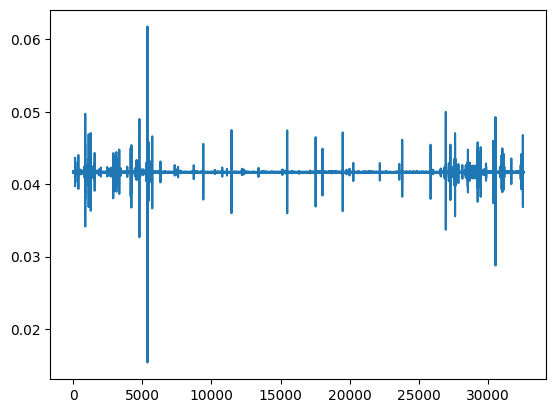

In [34]:
plt.plot(diff)

In [35]:
cb.cb.cancel()
sbc.gpio_free(chip, 17)
sbc.gpiochip_close(chip)

0

In [29]:
sbc.gpio_read(chip, 17)

error: 'unknown handle'